In [1]:

# Makes the plots smaller - run this first
options(repr.plot.width=4, repr.plot.height=3)

# Simulating and Calculating Probabilites with R

## Outline

1. Estimating a probability through simulation.
    1. Generating random normal data
    2. Using inequalities and mean to estimate the probability
2. Visualizing the answer by shading a graph.
3. Using `pnorm` to compute the exact normal probability.

##  Estimating a probability through simulation.

The easiest way to estimate a probability is

1. Simulate data from the distribution
2. Use the empirical probability estimate

$$ \text{Empirical Probability} = \frac{\text{Number Successes}}{\text{Number Trials}} $$

## Random normal data

We can use the `rnorm` function to general normal data

    rnorm(num_trials, mean, sd)

In [2]:
xs <- rnorm(10, 5, 1)
xs

[1] 4.288460 5.281061 5.061221 3.732312 4.393259 4.814198 4.761074 4.448437
 [9] 5.628517 6.684332

## Inequalities, R vectors, `sum` and `mean`

When using a `vector` in an inequality, R checks each value

In [3]:
xs < 5

[1]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE

## Adding Boolean vectors counts the number of `TRUE` values

Next, we can get the number of True values using `sum`

In [4]:
sum(xs < 5)

[1] 6

## Averaging Boolean vectors gives the fraction of `TRUE` values

Even better, we can use `mean` to get the fraction of `TRUE` values

In [5]:
mean(xs < 5)

[1] 0.6

## Example: Putting it all together

Heights of women in their 20's $\longrightarrow$ normal(64.5, 2.5)

**Question:** What is the probability that a randomly selected women is taller than 62 inches?

That is find 

$$P(H > 62) $$

### 1. Simulate the distribution

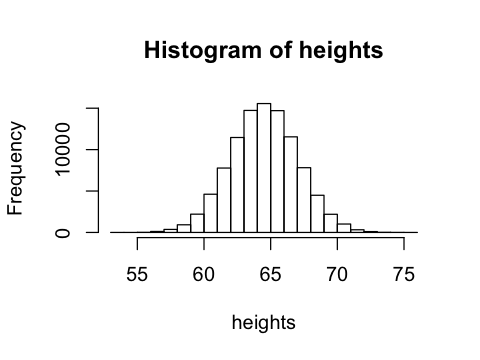

In [6]:
heights <- rnorm(100000, 64.5, 2.5)
hist(heights)

### 2. Estimate the probability

In [7]:
mean(heights > 62)

[1] 0.83976

## Example

**Same distribution:** $normal\left(\mu = 64.5, \sigma = 2.5\right)$

**Question:** the probability a randomly selected women is between 64 and 68 inches tall, inclusive.

**Task:** Use simulation to estimate the probability

In [13]:
mean(heights >= 64 & heights <= 64)

[1] 0

## Exercise

**Same distribution:** $normal\left(\mu = 64.5, \sigma = 2.5\right)$

**Question:** the probability a randomly selected women is less than 63 inches tall.

**Task:** Use simulation to estimate the probability

## Visualizing Normal Probability

* Probability = area under the curve
* Visualize with attached function

In [8]:
shade_normal <- function(l, u, mean, sd) {
  cord.x <- c(l,seq(l,u,0.01),u) 
  cord.y <- c(0,dnorm(seq(l,u,0.01), mean, sd),0) 
  curve(dnorm(x,mean,sd),xlim=c(mean-3*sd,mean+3*sd),main='Normal Distribution') 
  polygon(cord.x,cord.y,col='skyblue')
}

**Note:** Don't worry if you don't understand the code

## Example
We want to illustrate $P(H > 62)$.

1. **Use Interval Notation:** $H\in(62,\infty)$
2. **Change $\infty$:** Uses a larger number for $\infty$
3. **Change $-\infty$:** Uses a larger number for $-\infty$

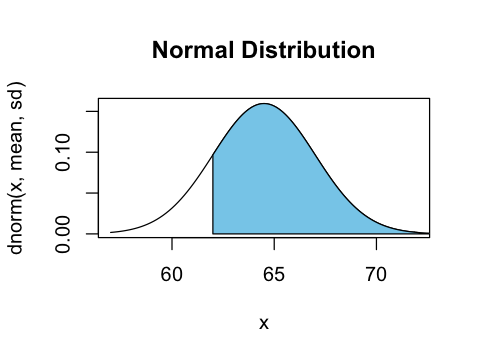

In [9]:
shade_normal(62, 1000, 64.5, 2.5)

## Exercise

**Same distribution:** $normal\left(\mu = 64.5, \sigma = 2.5\right)$

**Question:** the probability a randomly selected women is less than 63 inches tall.

**Task:** Visualize the probability


## Exercise

**Same distribution:** $normal\left(\mu = 64.5, \sigma = 2.5\right)$

**Question:** the probability a randomly selected women is between 64 and 68 inches tall.

**Task:** Visualize the probability


## Calculating the exact probability with `pnorm`

`pnorm` is for **tail area**

We can use `pnorm` to compute exact probability as follows

1. Use `pnorm(u, mean, sd)` for $P(X < u)$ or $P(X \le u)$
    * left tail problem
2. Use `pnorm(u, mean, sd, lower.tail = FALSE)` for $P(X > u)$ or $P(X \ge u)$
    * right tail problem
3. Use `1 - pnorm(l, mean, sd) - pnorm(u, mean, sd, lower.tail = FALSE)` for $P(l < X < u)$ etc.
    * two tail problem
    

In [10]:
prob_less_62 = pnorm(62, 64.5, 2.5)
prob_less_62 

[1] 0.1586553

In [11]:
prob_greater_63 = pnorm(63, 64.5, 2.5, lower.tail = FALSE)
prob_greater_63 

[1] 0.7257469

In [12]:
prob_between_64_68 = 1 - pnorm(64, 64.5, 2.5) - pnorm(68, 64.5, 2.5, lower.tail = FALSE)
prob_between_64_68 

[1] 0.4985031

# Code Cells for Homework